# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Notes: Citipy being a library that uses the approx (or range) of long/lat to find the corresponding city.
# I wonder the margins of error that would be relevant to such a library.

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



# Notes: It seems that -90 to 90 and -180 to 180 are the limits of our latitudes and longitudes
# respectively.
# I'm also curious as to what the size = 1500 means and why its different than len(cities).
# Repeated values?
#
# Length of 'cities' keeps changing every run because it's based on randomly generated numbers, which regenerate,
# randomly, every run.



# Debug Statements:
# ~~~~~~~~~~~~~~~~

# len(lats) <---- outputs to 1500, thus lat_lngs outputs 1500

# cities <-------- list of cities


605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Well, here we go. The list of cities are already generated. Now, we just need to perform the api calls.
# As well we'll also need a way to store them and their respective data.

base_url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key + "&q="

results= []
weatherdata = {}

count = 1
countset = 1

for x in cities:
    
    city_url = x
    api_url = base_url + city_url
    
    response = requests.get(api_url)
    response_json = response.json()
    
    data = response_json
    
    results.append(data)
    
    try:
        weatherdata[data['name']] = {'cloudiness' : data['clouds']['all'],
                                     'country' : data['sys']['country'],
                                     'date' : data['dt'],
                                     'humidity' : data['main']['humidity'],
                                     'lat' : data['coord']['lat'],
                                     'long' : data['coord']['lon'],
                                     'max_temp' : data['main']['temp_max'],
                                     'wind_speed' : data['wind']['speed']
                                    }
        name = data['name']
        
        
        if count == 50:
        
            print(f"Processing record {count} in set {countset}: {name}")
            print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

            countset += 1
            count = 1
        else:
        
            print(f"Processing record {count} in set {countset}: {name}")
            count += 1

    except KeyError:
        print("City not found...")
        
   
    
    
    
    
#     print(f"Storing city {name} in set {countset} as result {count}")


# List of all cities and their weather data from the API.
# results

# example_city = results[4]

# weatherdata




# Debug Statements:
# ~~~~~~~~~~~~~~~~~~~~

# response = requests.get(base_url + cities[7])
# pprint(example_city)

# example_city['clouds']['all']

# weatherdata[example_city['name']] = {'cloudiness' : example_city['clouds']['all']}

# weatherdata



# Notes: Need to have 'http://' in front of the url or it won't work.

Processing record 1 in set 1: Sao Miguel do Araguaia
Processing record 2 in set 1: Albany
Processing record 3 in set 1: Verkhnevilyuysk
Processing record 4 in set 1: Rafaela
Processing record 5 in set 1: Arlit
Processing record 6 in set 1: Vaini
Processing record 7 in set 1: Usvyaty
Processing record 8 in set 1: Arraial do Cabo
Processing record 9 in set 1: Narsaq
Processing record 10 in set 1: Wanaka
Processing record 11 in set 1: Ushuaia
Processing record 12 in set 1: Rikitea
Processing record 13 in set 1: Qaanaaq
Processing record 14 in set 1: Busselton
Processing record 15 in set 1: Lazaro Cardenas
City not found...
Processing record 16 in set 1: Bethel
Processing record 17 in set 1: Yar-Sale
Processing record 18 in set 1: Beringovskiy
City not found...
Processing record 19 in set 1: Saskylakh
Processing record 20 in set 1: Severo-Kurilsk
Processing record 21 in set 1: Punta Arenas
City not found...
Processing record 22 in set 1: Souillac
Processing record 23 in set 1: Nangavalli
P

Processing record 40 in set 4: Portobelo
Processing record 41 in set 4: Hasaki
Processing record 42 in set 4: Ambajogai
Processing record 43 in set 4: Parana
Processing record 44 in set 4: Cedar City
Processing record 45 in set 4: Lebu
Processing record 46 in set 4: Pangnirtung
Processing record 47 in set 4: Turka
Processing record 48 in set 4: Port Lincoln
Processing record 49 in set 4: Lahaina
Processing record 50 in set 4: Esperance
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Processing record 1 in set 5: Chuy
Processing record 2 in set 5: Soyo
Processing record 3 in set 5: Belmonte
Processing record 4 in set 5: San Rafael
Processing record 5 in set 5: Nome
Processing record 6 in set 5: Luderitz
City not found...
Processing record 7 in set 5: Labuhan
Processing record 8 in set 5: Puerto El Triunfo
Processing record 9 in set 5: Soe
Processing record 10 in set 5: Sheltozero
Processing record 11 in set 5: Magdagachi
Processing record 12 in set 5: Sarila
Processing record 13 in set 5: Nikolskoye
Pr

Processing record 31 in set 8: Igualada
Processing record 32 in set 8: Portland
Processing record 33 in set 8: Oktyabrskiy
Processing record 34 in set 8: Opuwo
Processing record 35 in set 8: Ordzhonikidze
Processing record 36 in set 8: Kudeyevskiy
Processing record 37 in set 8: Mirnyy
City not found...
Processing record 38 in set 8: Turkan
Processing record 39 in set 8: Bilma
Processing record 40 in set 8: Zykovo
Processing record 41 in set 8: Ancud
Processing record 42 in set 8: Abu Zabad
Processing record 43 in set 8: Sorland
Processing record 44 in set 8: San Policarpo
Processing record 45 in set 8: Mahon
Processing record 46 in set 8: Bila Krynytsya
Processing record 47 in set 8: Sibu
Processing record 48 in set 8: Victoria
Processing record 49 in set 8: Anloga
Processing record 50 in set 8: Hecun
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Processing record 1 in set 9: Coahuayana
Processing record 2 in set 9: Inhambane
Processing record 3 in set 9: Port Hedland
Processing record 4 in set 9: K

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# pprint(example_city)

NameError: name 'example_city' is not defined

In [5]:
weatherdata[cities[4].title()] # Need to add .title() to change the city name to titlecase so that the API
                               # recognizes it.
    
#Need to make a dataframe

citynames = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
maxtemp = []
windspeed = []

for x in weatherdata:
    
    citynames.append(x)
    cloudiness.append(weatherdata[x]['cloudiness'])
    country.append(weatherdata[x]['country'])
    date.append(weatherdata[x]['date'])
    humidity.append(weatherdata[x]['humidity'])
    latitude.append(weatherdata[x]['lat'])
    longitude.append(weatherdata[x]['long'])
    maxtemp.append(weatherdata[x]['max_temp'])
    windspeed.append(weatherdata[x]['wind_speed'])
    
df_cityweather = pd.DataFrame({'Cities' : citynames,
                               'Cloudiness' : cloudiness,
                               'Country' : country,
                               'Date' : date,
                               'Humidity': humidity,
                               'Latitude': latitude,
                               'Longitude' : longitude,
                               'Max Temperature (K)': maxtemp,
                               'Wind Speed' : windspeed})

# print(weatherdata[cities[14].title()])

print(df_cityweather.count())


df_cityweather #seems to work so far

Cities                 537
Cloudiness             537
Country                537
Date                   537
Humidity               537
Latitude               537
Longitude              537
Max Temperature (K)    537
Wind Speed             537
dtype: int64


,Cities,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature (K),Wind Speed
0,Sao Miguel do Araguaia,38,BR,1569534201,29,-13.28,-50.16,307.333,3.05
1,Albany,90,US,1569534115,82,42.65,-73.75,290.370,2.10
2,Verkhnevilyuysk,17,RU,1569534306,93,63.45,120.31,271.943,2.00
3,Rafaela,63,AR,1569534306,25,-31.25,-61.49,300.930,1.34
4,Arlit,0,NE,1569534306,9,18.74,7.39,308.813,2.91
5,Vaini,100,IN,1569534307,95,15.34,74.49,296.673,1.39
6,Usvyaty,0,RU,1569534307,83,55.75,30.75,276.373,0.61
7,Arraial do Cabo,90,BR,1569534307,94,-22.97,-42.02,293.150,3.60
8,Narsaq,3,GL,1569534307,52,60.91,-46.05,281.150,2.60
9,Wanaka,100,NZ,1569534308,64,-44.70,169.14,284.260,2.61


In [6]:
df_cityweather.to_csv('cityweather.csv', index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

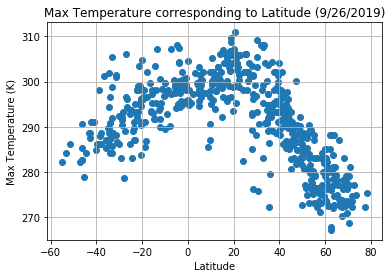

<Figure size 432x288 with 0 Axes>

In [7]:
plt.scatter(df_cityweather['Latitude'], df_cityweather['Max Temperature (K)'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.title('Max Temperature corresponding to Latitude (9/26/2019)')
plt.grid()
plt.show()
plt.savefig("temperature_vs_latitude.png")

# In the below plot, we do see a raise in temperature as latitude approaches zero.

#### Latitude vs. Humidity Plot

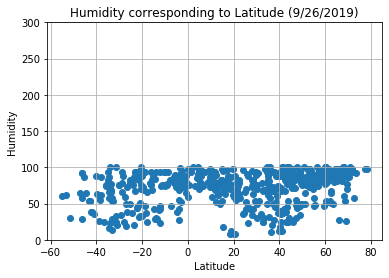

<Figure size 432x288 with 0 Axes>

In [8]:
plt.scatter(df_cityweather['Latitude'], df_cityweather['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity corresponding to Latitude (9/26/2019)')
plt.grid()
plt.ylim(0, 300)
plt.show()
plt.savefig("humidity_vs_latitude.png")


# There seems to be no correlation between humidity and latitude, except that we do
# perhaps see more humidity near the equator. But this looks slight.

#### Latitude vs. Cloudiness Plot

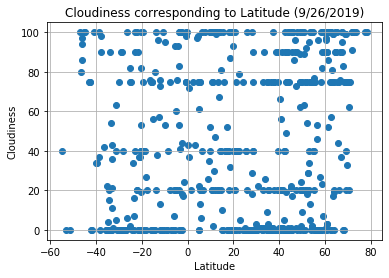

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(df_cityweather['Latitude'], df_cityweather['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness corresponding to Latitude (9/26/2019)')
plt.grid()
plt.show()
plt.savefig("cloudiness_vs_latitude.png")


# There does not seem to be any correlation between cloudiness and latitude. Interestingly,
# cloudiness levels seem to hover around certain percentages, like 20% and 40%

#### Latitude vs. Wind Speed Plot

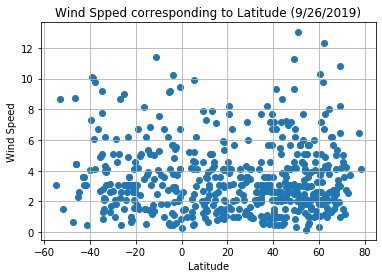

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(df_cityweather['Latitude'], df_cityweather['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Spped corresponding to Latitude (9/26/2019)')
plt.grid()
plt.show()
plt.savefig("windspeed_vs_latitude.png")


# Not much in terms of correlation between wind speed and latitude.

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots


In [12]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

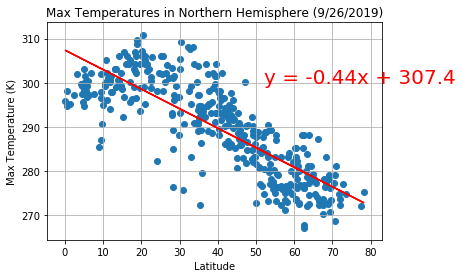

The r-squared value is: -0.808542510671407


<Figure size 432x288 with 0 Axes>

In [13]:
northern_hemp = df_cityweather.loc[df_cityweather['Latitude'] > 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemp['Latitude'], northern_hemp['Max Temperature (K)'])

regression = (northern_hemp['Latitude'] * slope) + intercept
line_eq = "y" + " = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(northern_hemp['Latitude'],regression, color = 'red')
plt.annotate(line_eq, (52,300),fontsize = 20 , color = 'red')

plt.scatter(northern_hemp['Latitude'], northern_hemp['Max Temperature (K)'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.title('Max Temperatures in Northern Hemisphere (9/26/2019)')
plt.grid()
plt.show()
plt.savefig("temperature_vs_latitude_northern.png")


print(f"The r-squared value is: {rvalue}")

# Strong correlation between temperature and latitude in the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

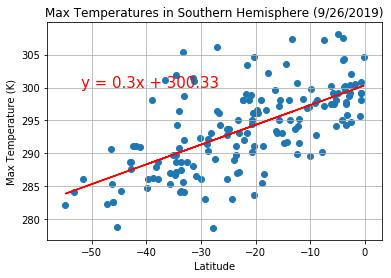

The r-squared value is: 0.6455081318778294


<Figure size 432x288 with 0 Axes>

In [14]:
southern_hemp = df_cityweather.loc[df_cityweather['Latitude'] < 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemp['Latitude'], southern_hemp['Max Temperature (K)'])

regression = (southern_hemp['Latitude'] * slope) + intercept
line_eq = "y" + " = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(southern_hemp['Latitude'],regression, color = 'red')
plt.annotate(line_eq, (-52,300),fontsize = 15 , color = 'red')

plt.scatter(southern_hemp['Latitude'], southern_hemp['Max Temperature (K)'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.title('Max Temperatures in Southern Hemisphere (9/26/2019)')
plt.grid()
plt.show()
plt.savefig("temperature_vs_latitude_southern.png")


print(f"The r-squared value is: {rvalue}")

# As with the northern hemisphere, there is also a strong correlation between latitude and temperature.
# Although we seem to have less points in the southern hemisphere in our dataset.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

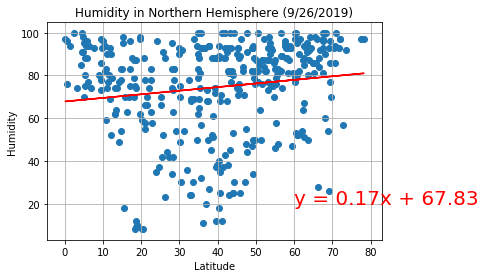

The r-squared value is: 0.14575891059861995


<Figure size 432x288 with 0 Axes>

In [15]:
northern_hemp = df_cityweather.loc[df_cityweather['Latitude'] > 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemp['Latitude'], northern_hemp['Humidity'])

regression = (northern_hemp['Latitude'] * slope) + intercept
line_eq = "y" + " = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(northern_hemp['Latitude'],regression, color = 'red')
plt.annotate(line_eq, (60,20),fontsize = 20 , color = 'red')

plt.scatter(northern_hemp['Latitude'], northern_hemp['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity in Northern Hemisphere (9/26/2019)')
plt.grid()
plt.show()
plt.savefig("humidity_vs_latitude_northern.png")


print(f"The r-squared value is: {rvalue}")

# No correlation between humidity and latitude in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

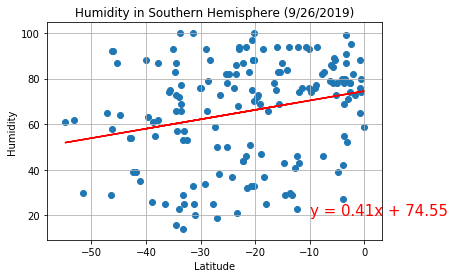

The r-squared value is: 0.2455841863072094


<Figure size 432x288 with 0 Axes>

In [16]:
southern_hemp = df_cityweather.loc[df_cityweather['Latitude'] < 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemp['Latitude'], southern_hemp['Humidity'])

regression = (southern_hemp['Latitude'] * slope) + intercept
line_eq = "y" + " = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(southern_hemp['Latitude'],regression, color = 'red')
plt.annotate(line_eq, (-10,20),fontsize = 15 , color = 'red')

plt.scatter(southern_hemp['Latitude'], southern_hemp['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity in Southern Hemisphere (9/26/2019)')
plt.grid()
plt.show()
plt.savefig("humidity_vs_latitude_southern.png")


print(f"The r-squared value is: {rvalue}")

# No correlation between humidity and latitude in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

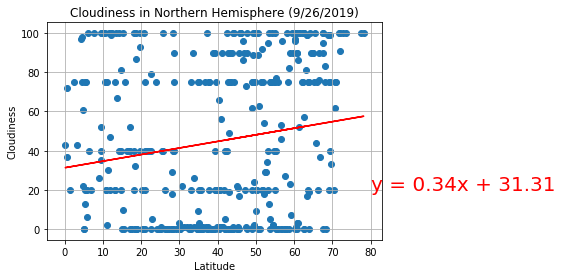

The r-squared value is: 0.16620507443898203


<Figure size 432x288 with 0 Axes>

In [17]:
northern_hemp = df_cityweather.loc[df_cityweather['Latitude'] > 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemp['Latitude'], northern_hemp['Cloudiness'])

regression = (northern_hemp['Latitude'] * slope) + intercept
line_eq = "y" + " = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(northern_hemp['Latitude'],regression, color = 'red')
plt.annotate(line_eq, (80,20),fontsize = 20 , color = 'red')

plt.scatter(northern_hemp['Latitude'], northern_hemp['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness in Northern Hemisphere (9/26/2019)')
plt.grid()
plt.show()
plt.savefig("cloudiness_vs_latitude_northern.png")


print(f"The r-squared value is: {rvalue}")

# No correlation between cloudiness and latitude in northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

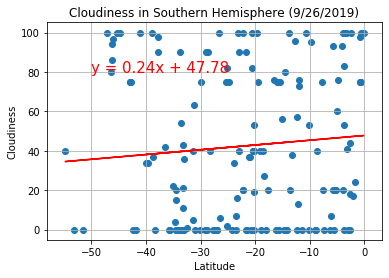

The r-squared value is: 0.0864712481646835


<Figure size 432x288 with 0 Axes>

In [18]:
southern_hemp = df_cityweather.loc[df_cityweather['Latitude'] < 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemp['Latitude'], southern_hemp['Cloudiness'])

regression = (southern_hemp['Latitude'] * slope) + intercept
line_eq = "y" + " = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(southern_hemp['Latitude'],regression, color = 'red')
plt.annotate(line_eq, (-50,80),fontsize = 15 , color = 'red')

plt.scatter(southern_hemp['Latitude'], southern_hemp['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness in Southern Hemisphere (9/26/2019)')
plt.grid()
plt.show()
plt.savefig("cloudiness_vs_latitude_southern.png")


print(f"The r-squared value is: {rvalue}")

# No correlation between cloudiness and latitude in southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

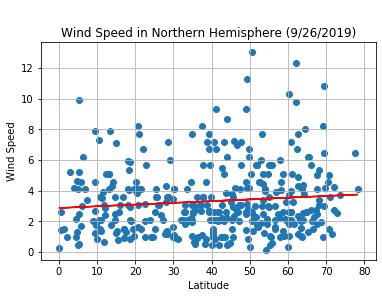

The r-squared value is: 0.09803738016225867


<Figure size 432x288 with 0 Axes>

In [19]:
northern_hemp = df_cityweather.loc[df_cityweather['Latitude'] > 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemp['Latitude'], northern_hemp['Wind Speed'])

regression = (northern_hemp['Latitude'] * slope) + intercept
line_eq = "y" + " = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(northern_hemp['Latitude'],regression, color = 'red')
plt.annotate(line_eq, (10,15),fontsize = 20 , color = 'red')

plt.scatter(northern_hemp['Latitude'], northern_hemp['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed in Northern Hemisphere (9/26/2019)')
plt.grid()
plt.show()
plt.savefig("windspeed_vs_latitude_northern.png")


print(f"The r-squared value is: {rvalue}")

# No correlation between wind speed and latitude in northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

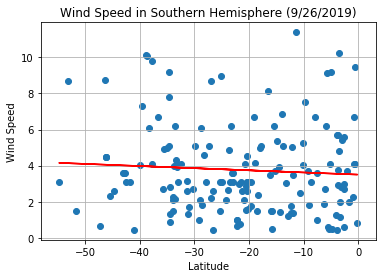

The r-squared value is: -0.06708335420966673


<Figure size 432x288 with 0 Axes>

In [20]:
southern_hemp = df_cityweather.loc[df_cityweather['Latitude'] < 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemp['Latitude'], southern_hemp['Wind Speed'])

regression = (southern_hemp['Latitude'] * slope) + intercept
line_eq = "y" + " = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(southern_hemp['Latitude'],regression, color = 'red')
plt.annotate(line_eq, (-20,12),fontsize = 15 , color = 'red')

plt.scatter(southern_hemp['Latitude'], southern_hemp['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed in Southern Hemisphere (9/26/2019)')
plt.grid()
plt.show()
plt.savefig("windspeed_vs_latitude_southern.png")


print(f"The r-squared value is: {rvalue}")

# No correlation between wind speed and latitude in southern hemisphere.